<a href="https://colab.research.google.com/github/jeba0909/EDA/blob/main/21BDS0320_M6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MODULE 6**

In [24]:
# Libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [25]:
X=pd.read_csv("/content/PPGE.csv")

In [26]:
# Check for non-numeric columns
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Using One-Hot Encoding to convert categorical columns to numeric
X_numeric = pd.get_dummies(X, columns=non_numeric_cols, drop_first=True)

# Step 1: Check for NaN values
print("NaN values in the dataset:", X_numeric.isna().sum().sum())

# Step 2: Check for infinite values
print("Infinite values in the dataset:", np.isinf(X_numeric).sum().sum())

# Handle NaN values (drop or fill)
X_numeric.dropna(inplace=True)  # Dropping rows with NaN values
# Alternatively, you can fill NaN values: X_numeric.fillna(X_numeric.mean(), inplace=True)

# Replace infinite values with NaN and then drop them
X_numeric.replace([np.inf, -np.inf], np.nan, inplace=True)
X_numeric.dropna(inplace=True)

# Step 3: Ensure all data is numeric
print(X_numeric.dtypes)
X_numeric = X_numeric.astype(float)

Non-numeric columns: Index(['country', 'iso3c'], dtype='object')
NaN values in the dataset: 74
Infinite values in the dataset: 0
rownames                    int64
year                        int64
govtspendgdp              float64
tradegdp                  float64
kaopen                    float64
ka_open                   float64
v2catrauni                float64
v2catrauni_ord              int64
country_Austria              bool
country_Belgium              bool
country_Canada               bool
country_Denmark              bool
country_Finland              bool
country_France               bool
country_Germany              bool
country_Greece               bool
country_Ireland              bool
country_Italy                bool
country_Japan                bool
country_Netherlands          bool
country_Norway               bool
country_Portugal             bool
country_Spain                bool
country_Sweden               bool
country_Switzerland          bool
country_United Kingdo

<ipython-input-31-776f2a8b0809>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], palette="viridis", s=50)


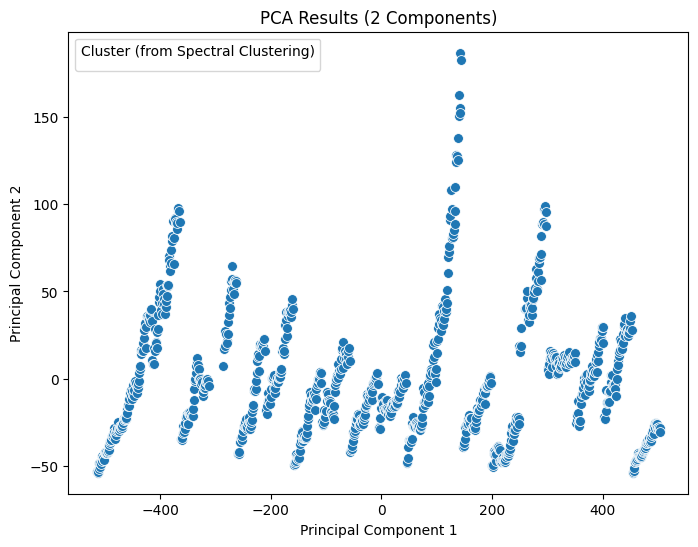

In [31]:

# Principal Component Analysis (PCA)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_numeric)

# Visualize PCA Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], palette="viridis", s=50)
plt.title("PCA Results (2 Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster (from Spectral Clustering)")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
<ipython-input-33-4dc3ff5fc2d6>:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], palette="plasma", s=50)


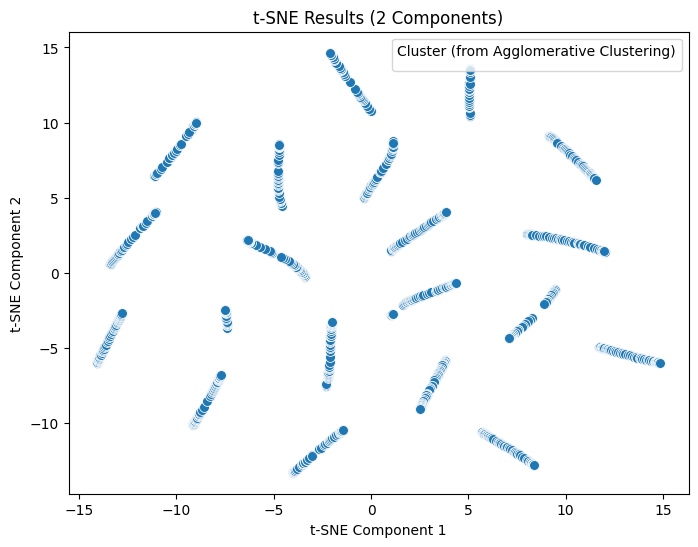

In [33]:

# t-SNE for Non-linear Dimensionality Reduction
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_components = tsne.fit_transform(X_numeric)

# Visualize t-SNE Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_components[:, 0], y=tsne_components[:, 1], palette="plasma", s=50)
plt.title("t-SNE Results (2 Components)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster (from Agglomerative Clustering)")
plt.show()